<a href="https://colab.research.google.com/github/LuisIrigoyen/trabajo_final_RL/blob/Carlos_Kong/Proyecto_pra%CC%81ctico_grupo_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1:
*   Alumno 2:
*   Alumno 3:






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/MyDrive/dqn_spaceinvaders_checkpoints"
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints  exists.

Colab: Changing directory to  /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints
/content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints
Archivos en el directorio: 
['video', 'logs', 'checkpoint', 'dqn_SpaceInvaders-v0_weights.h5f.data-00000-of-00001', 'dqn_SpaceInvaders-v0_weights.h5f.index', '400k.zip', 'sequential_memory_2.pkl.zip', 'weightsv2.2', 'weightsv2.3', 'sequential_memory_2.3.pkl.zip', 'legacy', 'weightsv4', 'puntuacion 18.3 weigths 5', 'weights_5', 'sequential_memory_5.pkl', 'weights_6', 'wrapper', 'sequential_memory_6.pkl.zip', 'sequential_memory.pkl.zip', 'cut', 'sequential_memory_cut.pkl', 'cutv2', 'sequential_memory_cutv2.pkl']


---
### 1.4. Instalar librerías necesarias

In [ ]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12  #2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.3 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654617 sha256=a7fc139c037fde3cc6ede75d069b1374e0c7f50d5fa21f52a97c4a1c3942e3f7
  Stored in directory: /root/.cache/pip/wheels/07/8b/b7/570cb90b10f17e85ccb291ba1f04af41ec697745104a2263eb
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.1
    Uninstalling cloudpickle-3.1.1:
      Successfully uninstalled cloudpickle-3.1.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires cloudpickle

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [ ]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
# from keras.optimizers import Adam  # from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [ ]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [ ]:
processor = AtariProcessor()

## 1. Implementación de la red neuronal

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Permute

In [ ]:
# Red neuronal
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=(WINDOW_LENGTH, 84, 84)))
model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu'))
model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)                 3

### Definimos una red neuronal también para la arquitectura Dueling DQN:

In [ ]:
def build_model(height, width, channels, actions):
    model = Sequential()

    # Capa 1: Conv2D con BatchNorm y ReLU
    model.add(Convolution2D(32, (8, 8), strides=(4, 4), padding='same', input_shape=(4,84,84,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Capa 2: Conv2D con BatchNorm y ReLU
    model.add(Convolution2D(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Capa 3: Conv2D con BatchNorm y ReLU
    model.add(Convolution2D(64, (3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Aplanar + Capas Dense
    model.add(Flatten())

    # Capa Fully Connected con Dropout
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    # model.add(Dropout(0.3))  # Opcional para evitar overfitting

    # Capa de salida
    model.add(Dense(actions, activation='linear'))

    return model

In [ ]:
model = build_model(84, 84, 1, nb_actions)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4, 21, 21, 32)     2080      
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 21, 21, 32)     128       
_________________________________________________________________
activation (Activation)      (None, 4, 21, 21, 32)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 11, 11, 64)     32832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 11, 11, 64)     256       
_________________________________________________________________
activation_1 (Activation)    (None, 4, 11, 11, 64)     0         
__________________________________________________

Para realizar la implementación se creó una red neuronal convolucional para tareas de visión por computadora. La arquitectura se eligió considerando buenas prácticas validadas en literatura como el paper original de DeepMind (Mnih et al., 2015), adaptándola con batch normalization y capacidad para extenderse hacia variantes como Double DQN o Dueling DQN.

Así mismo, a continuación justificamos la estructura:
- Entrada de 4 frames apilados: Lo que permite capturar la dinámica temporal del entorno.
- 3 Capas convolucionales profundas: Que nos permite extraer patrones visuales progresivamente desde bordes simples hasta características más complejas.
- Batch Normalization: Que sirve para mejorar la estabilidad y acelera la convergencia, siendo especialmente útil cuando se entrenan en sesiones de tiempo limitado (como en el caso de este modelo, que fue ejecutado empleando Colab).
- Capa densa de 512 neuronas: Que actuó como codificador del estado de la toma de decisiones.
- Capa de salida lineal: Que produjo los valores Q para cada acción posible, sin necesidad de usar el softmax.

**Antecedentes técnicos y de uso**:
Debido a que en mi caso no contaba con recursos de cómputo locales con GPU integrado, opté por desarrollar y entrenar el modelo usando Google Colab, aprovechando:
1.   Acceso gratuito a GPU.
1.   Facilidad de colaboración en línea con el equipo de trabajo.
1.   Soporte integrado para librerias requeridas.
1.   Cabe resaltar, que por la disponibilidad de Colab, se almacenaron los pesos paulatinamente en una ruta de Drive para no perder el entrenamiento.

## 2. Implementación de la solución DQN

### Código Eduardo (Después cambiamos el nombre de esta sección)

Primero hacemos una modificación del preprocesador, ya que en las observaciones (imágenes del juego) se incluye una barra superior que muestra el puntaje actual. Sin embargo, esta región de la imagen no forma parte del estado del juego que el agente necesita para tomar decisiones óptimas, ya que el puntaje refleja el rendimiento pasado, no información sobre la situación actual en el entorno (como la posición de enemigos o del jugador). Además, incluir el puntaje en las observaciones puede inducir sesgos. Originalmente las observaciones se ven de la siguiente manera:

In [ ]:
processor = AtariProcessor()

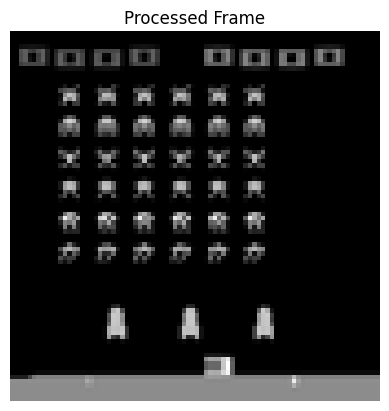

In [ ]:
import matplotlib.pyplot as plt

frame = env.reset()
processed_frame = processor.process_observation(frame)

plt.imshow(processed_frame, cmap='gray')
plt.title("Processed Frame")
plt.axis('off')
plt.show()

Por lo que procedemos a quitar esta región de la imagen agregando al preprocesador la línea: `cropped_observation = observation[34:194, :, :]`

In [ ]:
from PIL import Image
import numpy as np

class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)

        # 1. Recortar imagen (eliminar HUD, solo zona de juego)
        # Gym Atari frames suelen ser 210x160x3, recortamos y=34:194
        cropped_observation = observation[34:194, :, :]

        # 2. Convertir a PIL, escala de grises, redimensionar
        img = Image.fromarray(cropped_observation)
        img = img.resize(INPUT_SHAPE).convert('L')  # INPUT_SHAPE usualmente (84, 84)

        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

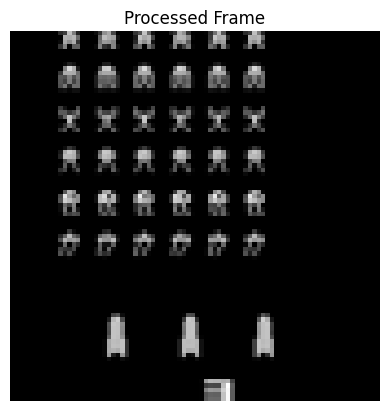

In [ ]:
import matplotlib.pyplot as plt

frame = env.reset()
processed_frame = processor.process_observation(frame)

plt.imshow(processed_frame, cmap='gray')
plt.title("Processed Frame")
plt.axis('off')
plt.show()

Usamos un wrapper que termina el episodio al perder una vida, así reducimos la duración media de cada episodio, lo cual permite realizar más iteraciones de entrenamiento en menos tiempo real, donde el agente puede sobrevivir por largo tiempo en las vidas siguientes, incluso sin mejorar significativamente su política.

In [ ]:
import gym

class LifeTerminatingWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.lives = 0
        self.was_real_done = True
        self.steps_since_enemy_kill = 0  # Nuevo contador
        self.consecutive_shots = 0

    def step(self, action):
        obs, reward, done, info = self.env.step(action)

        # --- Terminar episodio si pierde una vida ---
        lives = info.get('ale.lives', 0)
        if self.lives > lives > 0:
            done = True
        self.lives = lives

        return obs, reward, done, info

    def reset(self, **kwargs):
        if self.was_real_done:
            obs = self.env.reset(**kwargs)
        else:
            obs, _, _, _ = self.env.step(0)
        self.lives = self.env.unwrapped.ale.lives()
        self.last_direction = None
        self.direction_streak = 0
        return obs

In [ ]:
import os
from gym.wrappers import Monitor

checkpoint_dir = drive_root
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
from rl.callbacks import Callback

class SaveCheckpointCallback(Callback):
    def __init__(self, interval, path_template, reward_log_path):
        self.interval = interval
        self.path_template = path_template
        self.reward_log_path = reward_log_path
        self.episode_rewards = []

        # Crear carpeta para rewards si es necesario
        if self.reward_log_path:
            reward_dir = os.path.dirname(self.reward_log_path)
            if reward_dir and not os.path.exists(reward_dir):
                os.makedirs(reward_dir)
                print(f"📂 Carpeta creada: {reward_dir}")

    def on_step_end(self, step, logs={}):
        if step % self.interval == 0:
            filename = self.path_template.format(step=step)
            print(f"\n💾 Guardando pesos en: {filename}")
            self.model.save_weights(filename, overwrite=True)


    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward', 0)
        self.episode_rewards.append(reward)
        if self.reward_log_path:
            np.save(self.reward_log_path, np.array(self.episode_rewards))

In [ ]:
memory = SequentialMemory(limit=330000, window_length=WINDOW_LENGTH)

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

#### Entrenamiento parte 1

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps = 400000
nb_steps_annealing = 300000
nb_steps_warmup=40000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=1, #0.22 # 0.24 # 0.35
                              value_min=0.1, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cut/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cut.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 400000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
    501/400000: episode: 1, duration: 3.645s, episode steps: 501, steps per second: 137, episode reward:  9.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.501 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
    717/400000: episode: 2, duration: 1.424s, episode steps: 216, steps per second: 152, episode reward:  2.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.426 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
    939/400000: episode: 3, duration: 1.454s, episode steps: 222, steps per second: 153, episode reward:  2.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.320 [0.000, 5.000],  loss: --,

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  40185/400000: episode: 138, duration: 14.709s, episode steps: 327, steps per second:  22, episode reward:  6.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.746 [0.000, 5.000],  loss: 0.005168, mae: 0.034906, mean_q: 0.060796, mean_eps: 0.879718

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
  40344/400000: episode: 139, duration: 9.459s, episode steps: 159, steps per second:  17, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 2.447 [0.000, 5.000],  loss: 0.008573, mae: 0.018618, mean_q: 0.015574, mean_eps: 0.879208

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
  40589/400000: episode: 140, duration: 16.391s, episode steps: 245, steps per second:  15, episode reward:  9.000, mean reward:  0.037 [ 0.000,  1.000], mean action: 2.792 [0.000, 5.000],  loss: 0.009388, mae: 0.037327, mean_q: 0.052743, mean_eps: 0.878602

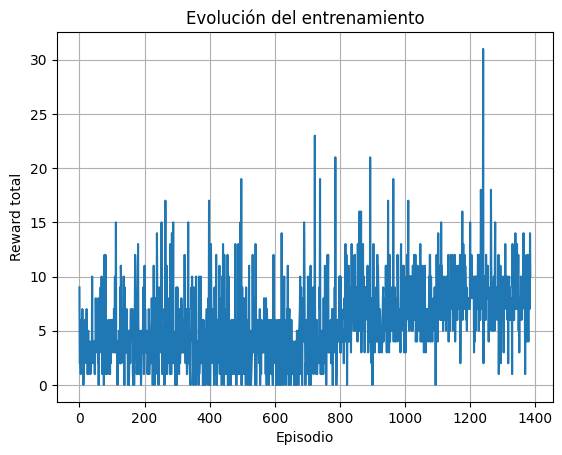

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cut.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cut.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cut/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 13.000, steps: 677
Episode 2: reward: 25.000, steps: 925
Episode 3: reward: 12.000, steps: 495
Episode 4: reward: 24.000, steps: 1296
Episode 5: reward: 17.000, steps: 1028
Episode 6: reward: 10.000, steps: 531
Episode 7: reward: 15.000, steps: 626
Episode 8: reward: 15.000, steps: 914
Episode 9: reward: 10.000, steps: 486
Episode 10: reward: 14.000, steps: 953
Episode 11: reward: 11.000, steps: 602
Episode 12: reward: 26.000, steps: 1287
Episode 13: reward: 14.000, steps: 956
Episode 14: reward: 20.000, steps: 944
Episode 15: reward: 12.000, steps: 663
Episode 16: reward: 17.000, steps: 1266
Episode 17: reward: 26.000, steps: 1752
Episode 18: reward: 15.000, steps: 1296
Episode 19: reward: 7.000, steps: 413
Episode 20: reward: 16.000, steps: 838
Episode 21: reward: 13.000, steps: 731
Episode 22: reward: 10.000, steps: 596
Episode 23: reward: 14.000, steps: 951
Episode 24: reward: 11.000, steps: 601
Episode 25: reward: 13.000, steps: 671
E

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 16.2


#### Entrenamiento parte 2

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps = 200000
nb_steps_annealing = 180000
nb_steps_warmup=40000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.4, #0.22 # 0.24 # 0.35
                              value_min=0.1, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cut/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv3/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv3.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 200000 steps ...

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    397/200000: episode: 1, duration: 2.655s, episode steps: 397, steps per second: 150, episode reward: 10.000, mean reward:  0.025 [ 0.000,  1.000], mean action: 2.637 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
    786/200000: episode: 2, duration: 2.376s, episode steps: 389, steps per second: 164, episode reward: 10.000, mean reward:  0.026 [ 0.000,  1.000], mean action: 2.308 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
   1049/200000: episode: 3, duration: 1.693s, episode steps: 263, steps per second: 155, episode reward:  8.000, mean reward:  0.030 [ 0.000,  1.000], mean action: 2.513 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoint

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  40199/200000: episode: 123, duration: 14.347s, episode steps: 225, steps per second:  16, episode reward:  8.000, mean reward:  0.036 [ 0.000,  1.000], mean action: 2.467 [0.000, 5.000],  loss: 0.017600, mae: 1.040625, mean_q: 1.271350, mean_eps: 0.333167

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
  40458/200000: episode: 124, duration: 16.663s, episode steps: 259, steps per second:  16, episode reward:  9.000, mean reward:  0.035 [ 0.000,  1.000], mean action: 2.815 [0.000, 5.000],  loss: 0.015329, mae: 1.025893, mean_q: 1.254379, mean_eps: 0.332787

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
  40758/200000: episode: 125, duration: 20.586s, episode steps: 300, steps per second:  15, episode reward:  8.000, mean reward:  0.027 [ 0.000,  1.000], mean action: 2.290 [0.000, 5.000],  loss: 0.013716, mae: 1.005662, mean_q: 1.228180, mean_eps: 0.3

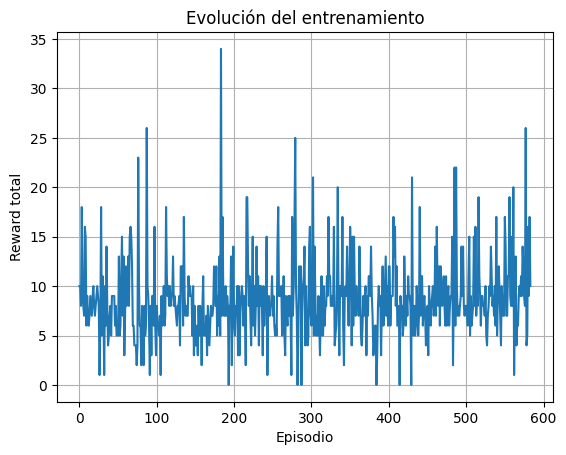

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cutv3.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cutv3.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 22.000, steps: 1257
Episode 2: reward: 24.000, steps: 962
Episode 3: reward: 28.000, steps: 1093
Episode 4: reward: 9.000, steps: 526
Episode 5: reward: 17.000, steps: 851
Episode 6: reward: 17.000, steps: 742
Episode 7: reward: 24.000, steps: 1057
Episode 8: reward: 18.000, steps: 1136
Episode 9: reward: 14.000, steps: 643
Episode 10: reward: 21.000, steps: 887
Episode 11: reward: 25.000, steps: 1033
Episode 12: reward: 28.000, steps: 1248
Episode 13: reward: 19.000, steps: 851
Episode 14: reward: 27.000, steps: 1230
Episode 15: reward: 13.000, steps: 729
Episode 16: reward: 23.000, steps: 1114
Episode 17: reward: 12.000, steps: 695
Episode 18: reward: 10.000, steps: 558
Episode 19: reward: 21.000, steps: 951
Episode 20: reward: 31.000, steps: 1811
Episode 21: reward: 14.000, steps: 663
Episode 22: reward: 13.000, steps: 1135
Episode 23: reward: 15.000, steps: 655
Episode 24: reward: 26.000, steps: 1256
Episode 25: reward: 24.000, steps: 858
Episode 26: reward: 16.0

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 19.34


#### Entrenamiento parte 3

In [ ]:
memory = SequentialMemory(limit=330000, window_length=WINDOW_LENGTH)

Explicamos el beneficio de utilizar todas las trazas (entrenamiento más estable)

In [ ]:
# Cargar
import pickle

with open('sequential_memory_cut.pkl', 'rb') as f:
    memory = pickle.load(f)

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps=50000
nb_steps_annealing=50000
nb_steps_warmup=50000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.4, #0.22 # 0.24 # 0.35
                              value_min=0.2, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv4/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv4.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps = 50000
nb_steps_annealing = 50000
nb_steps_warmup=0

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.1, #0.22 # 0.24 # 0.35
                              value_min=0.08, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv4/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv4.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 50000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv4/dqn_SpaceInvaders-v0_weights.h5f
   286/50000: episode: 1, duration: 30.439s, episode steps: 286, steps per second:   9, episode reward: 10.000, mean reward:  0.035 [ 0.000,  1.000], mean action: 3.332 [0.000, 5.000],  loss: 0.017933, mae: 1.482627, mean_q: 1.804475, mean_eps: 0.099942

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv4/dqn_SpaceInvaders-v0_weights.h5f
   782/50000: episode: 2, duration: 41.960s, episode steps: 496, steps per second:  12, episode reward: 12.000, mean reward:  0.024 [ 0.000,  1.000], mean action: 1.698 [0.000, 5.000],  loss: 0.014875, mae: 1.505839, mean_q: 1.832015, mean_eps: 0.099786

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv4/dqn_SpaceInvaders-v0_weights.h5f
  1008/50000: episode: 3, duration: 18.895s, episode steps: 226, steps per second:  12, episode reward:  8.000, mean reward:  0.035 [ 0.000,  1.

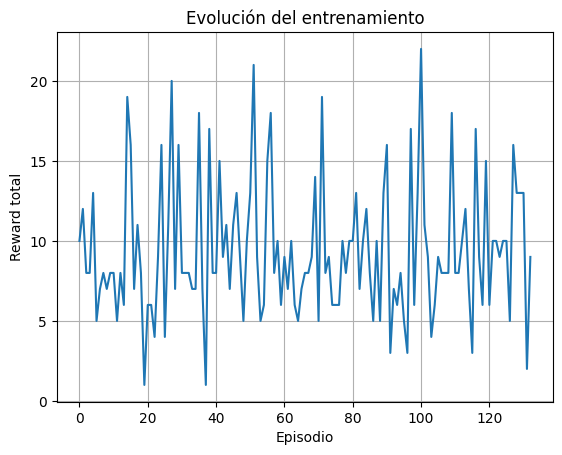

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cutv4.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cutv4.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

Test

In [ ]:
# Testing part to calculate the mean reward 02
weights_filename = checkpoint_dir + '/cutv4/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 35.000, steps: 1809
Episode 2: reward: 17.000, steps: 837
Episode 3: reward: 21.000, steps: 800
Episode 4: reward: 27.000, steps: 1133
Episode 5: reward: 22.000, steps: 942
Episode 6: reward: 19.000, steps: 1104
Episode 7: reward: 22.000, steps: 1542
Episode 8: reward: 29.000, steps: 1409
Episode 9: reward: 20.000, steps: 992
Episode 10: reward: 16.000, steps: 711
Episode 11: reward: 34.000, steps: 1463
Episode 12: reward: 16.000, steps: 870
Episode 13: reward: 19.000, steps: 692
Episode 14: reward: 23.000, steps: 1057
Episode 15: reward: 21.000, steps: 1054
Episode 16: reward: 20.000, steps: 663
Episode 17: reward: 12.000, steps: 538
Episode 18: reward: 22.000, steps: 917
Episode 19: reward: 22.000, steps: 1084
Episode 20: reward: 22.000, steps: 1010
Episode 21: reward: 10.000, steps: 675
Episode 22: reward: 11.000, steps: 643
Episode 23: reward: 15.000, steps: 690
Episode 24: reward: 20.000, steps: 1347
Episode 25: reward: 27.000, steps:

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 20.5


### Código Edward (Después cambiamos el nombre de esta sección)

### Código Luis (Después cambiamos el nombre de esta sección)

### Código Carlos (Arquitectura Dueling Network) ~Dueling Deep Q-Network:

In [ ]:
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

In [ ]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=0.01, value_test=0.005, nb_steps=1000000)
    memory = SequentialMemory(limit=500000, window_length=4)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  enable_dueling_network=True, dueling_type='avg',
                   nb_actions=nb_actions, nb_steps_warmup=1000,
                   batch_size=32,
                   processor=AtariProcessor()
                  )
    return dqn

In [ ]:
from rl.callbacks import ModelIntervalCheckpoint

# Guardar el modelo cada 50,000 pasos
checkpoint_callback = ModelIntervalCheckpoint(
    filepath='checkpoints/dqn_weights_{step}.h5f',
    interval=10000,  # cada 10,000 pasos
    verbose=1
)

In [ ]:
import os
os.makedirs("checkpoints", exist_ok=True)

In [ ]:
dqn = build_agent(model, nb_actions)
dqn.compile(Adam(learning_rate=1e-4))

La implementación del agente DQN presentada se justifica por su adecuación a entornos complejos como los videojuegos tipo Atari, donde las observaciones son visuales y secuenciales. Para ello, se emplea un procesador especializado (AtariProcessor) y una memoria de experiencia con window_length=4, lo que permite al agente capturar la dinámica temporal del entorno. El uso de la policy epsilon-greedy con decaimiento lineal favorece una exploración intensiva en las primeras etapas del entrenamiento y una explotación eficiente en las fases finales, distribuyendo el aprendizaje de forma progresiva y estable.

Además, se activa la arquitectura Dueling DQN, que separa la estimación del valor del estado y la ventaja de cada acción, permitiendo al agente aprender de forma más robusta incluso en estados donde algunas acciones tienen poco efecto. Esta mejora arquitectónica, combinada con la memoria de repetición y un tamaño de lote adecuado, contribuye a reducir la varianza y mejorar la estabilidad del aprendizaje.

Finalmente, el modelo se entrena con el optimizador Adam y se configura un sistema de guardado periódico que permite preservar versiones del agente a lo largo del entrenamiento, facilitando la recuperación y el análisis posterior del desempeño.

#### Entrenamiento parte 1

In [ ]:
from datetime import datetime

print(f"⏱ Tiempo de inicio: {datetime.now().strftime('%H:%M:%S')}")

dqn.fit(env, nb_steps=300000, visualize=False, verbose=2,callbacks=[checkpoint_callback])

print(f"⏱ Tiempo de fin: {datetime.now().strftime('%H:%M:%S')}")


⏱ Tiempo de inicio: 18:21:10
Training for 300000 steps ...


C:\Users\curso\anaconda3\envs\miar_rl\lib\site-packages\tensorflow\python\keras\engine\training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


    513/300000: episode: 1, duration: 5.703s, episode steps: 513, steps per second:  90, episode reward:  7.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.534 [0.000, 5.000],  loss: --, mean_q: --, mean_eps: --


C:\Users\curso\anaconda3\envs\miar_rl\lib\site-packages\tensorflow\python\keras\engine\training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


   1189/300000: episode: 2, duration: 51.488s, episode steps: 676, steps per second:  13, episode reward:  7.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.478 [0.000, 5.000],  loss: 0.199296, mean_q: 0.938525, mean_eps: 0.998916
   1706/300000: episode: 3, duration: 120.204s, episode steps: 517, steps per second:   4, episode reward:  5.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.603 [0.000, 5.000],  loss: 0.027185, mean_q: 0.955640, mean_eps: 0.998567
   2324/300000: episode: 4, duration: 141.814s, episode steps: 618, steps per second:   4, episode reward:  8.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.494 [0.000, 5.000],  loss: 0.015326, mean_q: 0.961571, mean_eps: 0.998006
   3138/300000: episode: 5, duration: 186.313s, episode steps: 814, steps per second:   4, episode reward: 13.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.472 [0.000, 5.000],  loss: 0.012298, mean_q: 0.852844, mean_eps: 0.997297
   3500/300000: episode: 6, durat

In [ ]:
dqn.save_weights('dqn_04_weights.h5f')

[WARNING] dqn_04_weights.h5f.index already exists - overwrite? [y/n] y


[TIP] Next time specify overwrite=True!


In [ ]:
weights_filename = 'dqn_04_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 13.000, steps: 697
Episode 2: reward: 15.000, steps: 912
Episode 3: reward: 11.000, steps: 669
Episode 4: reward: 13.000, steps: 671
Episode 5: reward: 4.000, steps: 429
Episode 6: reward: 15.000, steps: 940
Episode 7: reward: 22.000, steps: 920
Episode 8: reward: 18.000, steps: 861
Episode 9: reward: 12.000, steps: 907
Episode 10: reward: 17.000, steps: 1029


#### Entrenamiento parte 2

In [ ]:
#dqn_weights_100000.h5f
#Continuación al 325000 + 100000 + 100000+75000+100000 = 800000

dqn.load_weights("dqn_weights_75000.h5f")
# 🔢 Paso de partida 3
starting_step = 75000 #ultimo weight actualizado
remaining_steps = 200000 - starting_step


# 🧩 Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

# 🚀 Entrenamiento con pasos continuados desde 100000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])

Training for 125000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    634/125000: episode: 1, duration: 4.627s, episode steps: 634, steps per second: 137, episode reward: 11.000, mean reward:  0.017 [ 0.000,  1.000], mean action: 2.475 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1406/125000: episode: 2, duration: 5.157s, episode steps: 772, steps per second: 150, episode reward:  9.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.547 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1807/125000: episode: 3, duration: 1.898s, episode steps: 401, steps per second: 211, episode reward:  5.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.546 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2589/125000: episode: 4, duration: 3.808s, episode steps: 782, steps per second: 205, episode reward: 12.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.386 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   3305/125000: episode: 5, duration: 5.100s, episode steps: 716, steps per 

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50326/125000: episode: 79, duration: 81.127s, episode steps: 482, steps per second:   6, episode reward:  7.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.685 [0.000, 5.000],  loss: 0.011988, mae: 0.480977, mean_q: 0.591011, mean_eps: 0.774266
  50836/125000: episode: 80, duration: 122.197s, episode steps: 510, steps per second:   4, episode reward:  6.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.496 [0.000, 5.000],  loss: 0.011484, mae: 0.479145, mean_q: 0.585658, mean_eps: 0.772388
  51476/125000: episode: 81, duration: 156.931s, episode steps: 640, steps per second:   4, episode reward: 11.000, mean reward:  0.017 [ 0.000,  1.000], mean action: 2.466 [0.000, 5.000],  loss: 0.010772, mae: 0.475709, mean_q: 0.580060, mean_eps: 0.769800
  51971/125000: episode: 82, duration: 119.482s, episode steps: 495, steps per second:   4, episode reward: 11.000, mean reward:  0.022 [ 0.000,  1.000], mean action: 2.394 [0.000, 5.000],  loss: 0.009741, mae: 0.476042, mean_q

In [ ]:

weights_filename = 'dqn_weights_125000.h5f'.format(env)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 9.000, steps: 520
Episode 2: reward: 22.000, steps: 980
Episode 3: reward: 10.000, steps: 601
Episode 4: reward: 22.000, steps: 953
Episode 5: reward: 21.000, steps: 1026
Episode 6: reward: 10.000, steps: 638
Episode 7: reward: 6.000, steps: 477
Episode 8: reward: 9.000, steps: 522
Episode 9: reward: 8.000, steps: 688
Episode 10: reward: 7.000, steps: 598


#### Entrenamiento parte 3

aqui colocar todo el entrenamiento de: https://colab.research.google.com/drive/1jITASRB4yK1a7xb61uvMEL4Be4oxlTuN

In [ ]:
# AGENTE DQN
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory,
               nb_steps_warmup=50000, enable_double_dqn=True,
               enable_dueling_network=True, dueling_type='avg',
               target_model_update=10000, policy=policy,
               processor=AtariProcessor())

from keras.optimizers import Adam
dqn.compile(Adam(lr=0.00025), metrics=['mae'])

# CHECKPOINTS Y LOGGING
checkpoint_path = drive_root + '/dqn_weights_{step}.h5f'
weights_filename = drive_root + '/dqn_final_weights.h5f'

callbacks = [
    ModelIntervalCheckpoint(checkpoint_path, interval=25000),
    FileLogger(drive_root + '/dqn_log.json', interval=10000)
]

/usr/local/lib/python3.11/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# ENTRENAMIENTO
dqn.fit(env, nb_steps=1000000, visualize=False, verbose=2, callbacks=callbacks)
dqn.save_weights(weights_filename, overwrite=True)


Training for 1000000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    612/1000000: episode: 1, duration: 2.414s, episode steps: 612, steps per second: 254, episode reward:  7.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.480 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1256/1000000: episode: 2, duration: 2.400s, episode steps: 644, steps per second: 268, episode reward: 10.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.407 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1687/1000000: episode: 3, duration: 1.392s, episode steps: 431, steps per second: 310, episode reward:  6.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.434 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2465/1000000: episode: 4, duration: 2.388s, episode steps: 778, steps per second: 326, episode reward: 12.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.634 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   3211/1000000: episode: 5, duration: 2.198s, episode steps: 746, steps

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50144/1000000: episode: 70, duration: 23.850s, episode steps: 801, steps per second:  34, episode reward: 12.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.478 [0.000, 5.000],  loss: 0.006639, mae: 0.019060, mean_q: 0.026977, mean_eps: 0.954935
  50564/1000000: episode: 71, duration: 60.915s, episode steps: 420, steps per second:   7, episode reward:  5.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.617 [0.000, 5.000],  loss: 0.007052, mae: 0.020001, mean_q: 0.024775, mean_eps: 0.954682
  51062/1000000: episode: 72, duration: 71.727s, episode steps: 498, steps per second:   7, episode reward:  5.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.442 [0.000, 5.000],  loss: 0.008048, mae: 0.022247, mean_q: 0.026515, mean_eps: 0.954269
  51856/1000000: episode: 73, duration: 115.243s, episode steps: 794, steps per second:   7, episode reward: 11.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.567 [0.000, 5.000],  loss: 0.007479, mae: 0.020157, mean

In [ ]:
#Continuando con la ejecución en el peso 325,000

# Cargar pesos desde el paso 325,000
dqn.load_weights("dqn_weights_325000.h5f")



In [ ]:
# Paso de partida
starting_step = 325000
remaining_steps = 1000000 - starting_step


# Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

#  Entrenamiento con pasos continuados desde 325000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])


Training for 675000 steps ...
    964/675000: episode: 1, duration: 3.492s, episode steps: 964, steps per second: 276, episode reward: 21.000, mean reward:  0.022 [ 0.000,  1.000], mean action: 2.516 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1513/675000: episode: 2, duration: 1.993s, episode steps: 549, steps per second: 275, episode reward:  7.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.590 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2209/675000: episode: 3, duration: 2.896s, episode steps: 696, steps per second: 240, episode reward: 11.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.501 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2593/675000: episode: 4, duration: 2.313s, episode steps: 384, steps per second: 166, episode reward:  4.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.625 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   3243/675000: episode: 5, duration: 2.493s, 

In [ ]:
#dqn_weights_100000.h5f
#Continuación al 325000 + 100000 = 425000

# Paso de partida 2
starting_step = 100000 #ultimo weight actualizado
remaining_steps = 200000 - starting_step


# Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

# Entrenamiento con pasos continuados desde 100000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])


Training for 100000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   641/100000: episode: 1, duration: 6.721s, episode steps: 641, steps per second:  95, episode reward:  8.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.470 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  1268/100000: episode: 2, duration: 2.881s, episode steps: 627, steps per second: 218, episode reward:  8.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.456 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  1897/100000: episode: 3, duration: 2.492s, episode steps: 629, steps per second: 252, episode reward:  8.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.525 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  2286/100000: episode: 4, duration: 1.526s, episode steps: 389, steps per second: 255, episode reward:  5.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.494 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  2820/100000: episode: 5, duration: 2.423s, episode steps: 534, steps per secon

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 50030/100000: episode: 74, duration: 9.635s, episode steps: 392, steps per second:  41, episode reward:  4.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.212 [0.000, 5.000],  loss: 0.006832, mae: 0.029681, mean_q: 0.036759, mean_eps: 0.774932
 50803/100000: episode: 75, duration: 164.991s, episode steps: 773, steps per second:   5, episode reward: 12.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.485 [0.000, 5.000],  loss: 0.007734, mae: 0.033104, mean_q: 0.042827, mean_eps: 0.773128
 51754/100000: episode: 76, duration: 206.767s, episode steps: 951, steps per second:   5, episode reward: 15.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.548 [0.000, 5.000],  loss: 0.007015, mae: 0.029925, mean_q: 0.036879, mean_eps: 0.769249
 52759/100000: episode: 77, duration: 213.899s, episode steps: 1005, steps per second:   5, episode reward: 18.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.549 [0.000, 5.000],  loss: 0.007787, mae: 0.033912, mean_q: 0.

In [ ]:
dqn.load_weights("dqn_weights_100000.h5f")

# Test sin visualizar
test_episodes = 10
results = dqn.test(env, nb_episodes=test_episodes, visualize=False)


Testing for 10 episodes ...
Episode 1: reward: 8.000, steps: 575
Episode 2: reward: 11.000, steps: 775
Episode 3: reward: 9.000, steps: 821
Episode 4: reward: 7.000, steps: 662
Episode 5: reward: 17.000, steps: 1113
Episode 6: reward: 7.000, steps: 749
Episode 7: reward: 6.000, steps: 593
Episode 8: reward: 10.000, steps: 697
Episode 9: reward: 13.000, steps: 842
Episode 10: reward: 6.000, steps: 537


In [ ]:
#dqn_weights_100000.h5f
#Continuación al 325000 + 100000 + 100000 = 525000

# Paso de partida 3
starting_step = 100000 #ultimo weight actualizado
remaining_steps = 200000 - starting_step


# Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

# Entrenamiento con pasos continuados desde 100000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])

Training for 100000 steps ...
  1151/100000: episode: 1, duration: 6.220s, episode steps: 1151, steps per second: 185, episode reward: 10.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.453 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  1817/100000: episode: 2, duration: 2.648s, episode steps: 666, steps per second: 252, episode reward: 10.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.563 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  2485/100000: episode: 3, duration: 2.714s, episode steps: 668, steps per second: 246, episode reward:  7.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.528 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  3296/100000: episode: 4, duration: 3.234s, episode steps: 811, steps per second: 251, episode reward: 13.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.589 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  4126/100000: episode: 5, duration: 4.890s, epis

In [ ]:
dqn.load_weights("dqn_weights_100000.h5f")
test_episodes = 10
results = dqn.test(env, nb_episodes=test_episodes, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 4.000, steps: 396
Episode 2: reward: 4.000, steps: 411
Episode 3: reward: 14.000, steps: 903
Episode 4: reward: 23.000, steps: 1126
Episode 5: reward: 10.000, steps: 697
Episode 6: reward: 10.000, steps: 618
Episode 7: reward: 12.000, steps: 682
Episode 8: reward: 6.000, steps: 404
Episode 9: reward: 6.000, steps: 570
Episode 10: reward: 9.000, steps: 484


In [ ]:
#dqn_weights_100000.h5f
#Continuación al 325000 + 100000 + 100000+100000 = 625000

dqn.load_weights("dqn_weights_100000.h5f")
# Paso de partida 3
starting_step = 100000 #ultimo weight actualizado
remaining_steps = 200000 - starting_step


# Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

# Entrenamiento con pasos continuados desde 100000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])

Training for 100000 steps ...
   610/100000: episode: 1, duration: 2.797s, episode steps: 610, steps per second: 218, episode reward: 11.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.508 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   997/100000: episode: 2, duration: 2.538s, episode steps: 387, steps per second: 152, episode reward:  6.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.437 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  1729/100000: episode: 3, duration: 2.987s, episode steps: 732, steps per second: 245, episode reward: 10.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.430 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  2272/100000: episode: 4, duration: 2.140s, episode steps: 543, steps per second: 254, episode reward:  8.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.632 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  3108/100000: episode: 5, duration: 3.250s, episo

In [ ]:
test_episodes = 100
results = dqn.test(env, nb_episodes=test_episodes, visualize=False)

Testing for 100 episodes ...
Episode 1: reward: 20.000, steps: 979
Episode 2: reward: 22.000, steps: 971
Episode 3: reward: 26.000, steps: 1098
Episode 4: reward: 4.000, steps: 531
Episode 5: reward: 8.000, steps: 710
Episode 6: reward: 14.000, steps: 854
Episode 7: reward: 15.000, steps: 662
Episode 8: reward: 10.000, steps: 916
Episode 9: reward: 11.000, steps: 679
Episode 10: reward: 36.000, steps: 1685
Episode 11: reward: 19.000, steps: 963
Episode 12: reward: 9.000, steps: 504
Episode 13: reward: 20.000, steps: 991
Episode 14: reward: 16.000, steps: 834
Episode 15: reward: 20.000, steps: 990
Episode 16: reward: 24.000, steps: 1014
Episode 17: reward: 20.000, steps: 1088
Episode 18: reward: 8.000, steps: 521
Episode 19: reward: 13.000, steps: 654
Episode 20: reward: 14.000, steps: 644
Episode 21: reward: 20.000, steps: 1171
Episode 22: reward: 5.000, steps: 589
Episode 23: reward: 13.000, steps: 906
Episode 24: reward: 12.000, steps: 807
Episode 25: reward: 16.000, steps: 989
Episo

Promedio de la corrida anterior: 6.66

In [ ]:
#dqn_weights_100000.h5f
#Continuación al 325000 + 100000 + 100000+100000+100000 = 725000

dqn.load_weights("dqn_weights_100000.h5f")
# Paso de partida 3
starting_step = 100000 #ultimo weight actualizado
remaining_steps = 200000 - starting_step


# Callback personalizado para continuar numeración de checkpoints
class OffsetModelCheckpoint(ModelIntervalCheckpoint):
    def __init__(self, filepath, interval, offset):
        super().__init__(filepath, interval)
        self.offset = offset

    def on_step_end(self, step, logs={}):
        # Ajusta el número de paso en el nombre del archivo
        self.step = step + self.offset
        super().on_step_end(step, logs)

# Entrenamiento con pasos continuados desde 100000
dqn.fit(env, nb_steps=remaining_steps, visualize=False, verbose=2,
        callbacks=[
            FileLogger("dqn_log_continuacion.json", interval=10000),
            OffsetModelCheckpoint("dqn_weights_{step}.h5f", interval=25000, offset=starting_step)
        ])

Training for 100000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   653/100000: episode: 1, duration: 2.927s, episode steps: 653, steps per second: 223, episode reward:  8.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.403 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  1686/100000: episode: 2, duration: 3.620s, episode steps: 1033, steps per second: 285, episode reward: 19.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.353 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  2319/100000: episode: 3, duration: 2.411s, episode steps: 633, steps per second: 263, episode reward:  6.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.664 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  3246/100000: episode: 4, duration: 4.685s, episode steps: 927, steps per second: 198, episode reward: 13.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.485 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
  3788/100000: episode: 5, duration: 1.935s, episode steps: 542, steps per seco

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


 50159/100000: episode: 76, duration: 32.478s, episode steps: 624, steps per second:  19, episode reward:  7.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.554 [0.000, 5.000],  loss: 0.013205, mae: 0.400916, mean_q: 0.503530, mean_eps: 0.774642
 50777/100000: episode: 77, duration: 111.125s, episode steps: 618, steps per second:   6, episode reward: 10.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.529 [0.000, 5.000],  loss: 0.012779, mae: 0.399777, mean_q: 0.495600, mean_eps: 0.772896
 51478/100000: episode: 78, duration: 127.555s, episode steps: 701, steps per second:   5, episode reward:  9.000, mean reward:  0.013 [ 0.000,  1.000], mean action: 2.425 [0.000, 5.000],  loss: 0.011280, mae: 0.394649, mean_q: 0.485916, mean_eps: 0.769929
 51858/100000: episode: 79, duration: 69.164s, episode steps: 380, steps per second:   5, episode reward:  6.000, mean reward:  0.016 [ 0.000,  1.000], mean action: 2.271 [0.000, 5.000],  loss: 0.010363, mae: 0.398488, mean_q: 0.4

In [ ]:
dqn.load_weights("dqn_weights_100000.h5f")
test_episodes = 10
results = dqn.test(env,nb_episodes=test_episodes, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 8.000, steps: 381
Episode 2: reward: 5.000, steps: 439
Episode 3: reward: 9.000, steps: 523
Episode 4: reward: 18.000, steps: 894
Episode 5: reward: 14.000, steps: 888
Episode 6: reward: 12.000, steps: 555
Episode 7: reward: 26.000, steps: 1096
Episode 8: reward: 4.000, steps: 410
Episode 9: reward: 16.000, steps: 778
Episode 10: reward: 20.000, steps: 1140


## 3. Justificación de los parámetros seleccionados y de los resultados obtenidos

### Eduardo

### Edward

### Luis

### Carlos

---